## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = mouse_metadata.merge(study_results, on="Mouse ID")
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
num_mice = len(combined_df['Mouse ID'].unique())
num_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
cleaned_df = combined_df.groupby(["Timepoint","Mouse ID"])
cleaned_df = combined_df.drop_duplicates(["Timepoint","Mouse ID"],keep=False)
dups = cleaned_df.pivot_table(index = ['Mouse ID'], aggfunc ='size')
cleaned_df = cleaned_df.set_index("Mouse ID")
cleaned_df.index.unique()

Index(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546', 'z578',
       'j913',
       ...
       'y478', 'y601', 'y769', 'y865', 'z234', 'z314', 'z435', 'z581', 'z795',
       'z969'],
      dtype='object', name='Mouse ID', length=249)

In [6]:
grouped_mice = combined_df.groupby(["Timepoint","Mouse ID"]).count()
var = grouped_mice.loc[grouped_mice['Age_months']>1, "Sex"].reset_index()
var
mouse_ids = var['Mouse ID'].unique()
cleaner_df = combined_df.copy()
for i in mouse_ids:
    cleaner_df = combined_df.loc[combined_df['Mouse ID']!=i]
#len(combined_df['Mouse ID'].unique())

In [7]:
gender_count = combined_df.groupby(['Sex','Timepoint','Drug Regimen']).count()
gender_count

Mouse ID  Age_months  Weight (g)  \
Sex    Timepoint Drug Regimen                                     
Female 0         Capomulin           13          13          13   
                 Ceftamin            13          13          13   
                 Infubinol           12          12          12   
                 Ketapril             9           9           9   
                 Naftisol            13          13          13   
...                                 ...         ...         ...   
Male   45        Placebo              5           5           5   
                 Propriva             4           4           4   
                 Ramicane            15          15          15   
                 Stelasyn             4           4           4   
                 Zoniferol            4           4           4   

                               Tumor Volume (mm3)  Metastatic Sites  
Sex    Timepoint Drug Regimen                                        
Female 0         Capomulin                     13                13  
                 Ceftamin                      13                13  
                 Infubinol                     12                12  
                 Ketapril                       9                 9  
                 Naftisol                      13                13  
...                                           ...               ...  
Male   45        Placebo                        5                 5  
                 Propriva                       4                 4  
                 Ramicane                      15                15  
                 Stelasyn                       4                 4  
                 Zoniferol                      4                 4  

[200 rows x 5 columns]

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 



In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#mouse_ids = []
#or i in range(len(dups)):
#    if dups[i] < 10:
#        mouse_ids.append(dups.index[i])

#cleaned_df.drop(mouse_ids,  inplace=True)
#cleaned_df

In [10]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = len(cleaned_df.index.unique())
num_mice_cleaned

249

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_df = cleaned_df.groupby(["Drug Regimen"])
mean = grouped_df["Tumor Volume (mm3)"].mean()
median = grouped_df['Tumor Volume (mm3)'].median()
variance = grouped_df['Tumor Volume (mm3)'].var()
std = grouped_df['Tumor Volume (mm3)'].std()
SEM = grouped_df['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
stats = pd.concat([mean,median,variance,std,SEM], axis = 1)
stats.columns=['Mean','Median','Variance','Standard Deviation','SEM']
stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
grouped_df.agg({"Tumor Volume (mm3)":["mean",'median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

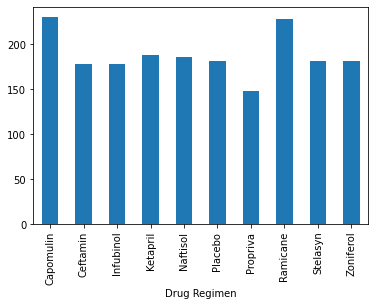

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen = cleaner_df.groupby("Drug Regimen")["Mouse ID"].count()
regimen

regimen.plot(kind="bar")
plt.show()

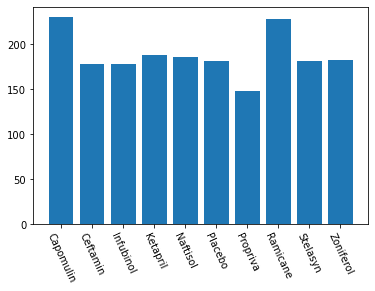

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(regimen.index,regimen.values)
plt.xticks(rotation = 295)
plt.show()

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = cleaner_df.groupby(["Sex"])["Mouse ID"].nunique()
gender_count
gender_count.plot(kind="pie")
plt.show()

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

[]

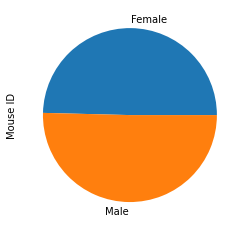

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count.plot.pie()
plt.plot()

## Quartiles, Outliers and Boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = cleaner_df.groupby(['Drug Regimen','Mouse ID','Timepoint','Tumor Volume (mm3)']).nunique()
regimens.head(20)
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Mouse ID  Drug Regimen  \
Drug Regimen Mouse ID Timepoint Tumor Volume (mm3)                           
Capomulin    b128     0         45.000000                  1             1   
                      5         45.651331                  1             1   
                      10        43.270852                  1             1   
                      15        43.784893                  1             1   
                      20        42.731552                  1             1   
                      25        43.262145                  1             1   
                      30        40.605335                  1             1   
                      35        37.967644                  1             1   
                      40        38.379726                  1             1   
                      45        38.982878                  1             1   
             b742     0         45.000000                  1             1   
                      5         41.534097                  1             1   
                      10        41.999228                  1             1   
                      15        39.524843                  1             1   
                      20        37.950355                  1             1   
                      25        38.617684                  1             1   
                      30        39.167949                  1             1   
                      35        39.847576                  1             1   
                      40        38.255627                  1             1   
                      45        38.939633                  1             1   

                                                    Sex  Age_months  \
Drug Regimen Mouse ID Timepoint Tumor Volume (mm3)                    
Capomulin    b128     0         45.000000             1           1   
                      5         45.651331             1           1   
                      10        43.270852             1           1   
                      15        43.784893             1           1   
                      20        42.731552             1           1   
                      25        43.262145             1           1   
                      30        40.605335             1           1   
                      35        37.967644             1           1   
                      40        38.379726             1           1   
                      45        38.982878             1           1   
             b742     0         45.000000             1           1   
                      5         41.534097             1           1   
                      10        41.999228             1           1   
                      15        39.524843             1           1   
                      20        37.950355             1           1   
                      25        38.617684             1           1   
                      30        39.167949             1           1   
                      35        39.847576             1           1   
                      40        38.255627             1           1   
                      45        38.939633             1           1   

                                                    Weight (g)  Timepoint  \
Drug Regimen Mouse ID Timepoint Tumor Volume (mm3)                          
Capomulin    b128     0         45.000000                    1          1   
                      5         45.651331                    1          1   
                      10        43.270852                    1          1   
                      15        43.784893                    1          1   
                      20        42.731552                    1          1   
                      25        43.262145                    1          1   
                      30        40.605335                    1          1   
                      35        37.967644                    1          1   
  

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
